Chen Zigeng  A0260093L
## LDA for Feature Extraction and Classification

[ 2  5  6  8  9 14 16 17 18 21 25 29 30 34 38 39 41 42 45 49 50 57 58 63
 65]
(2977, 1024)
(2977, 1)
(1277, 1024)
(1277, 1)


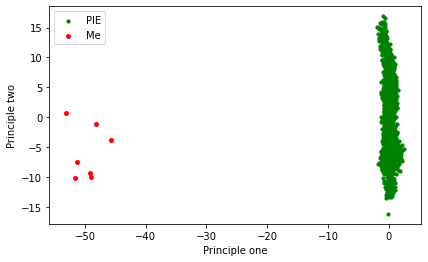

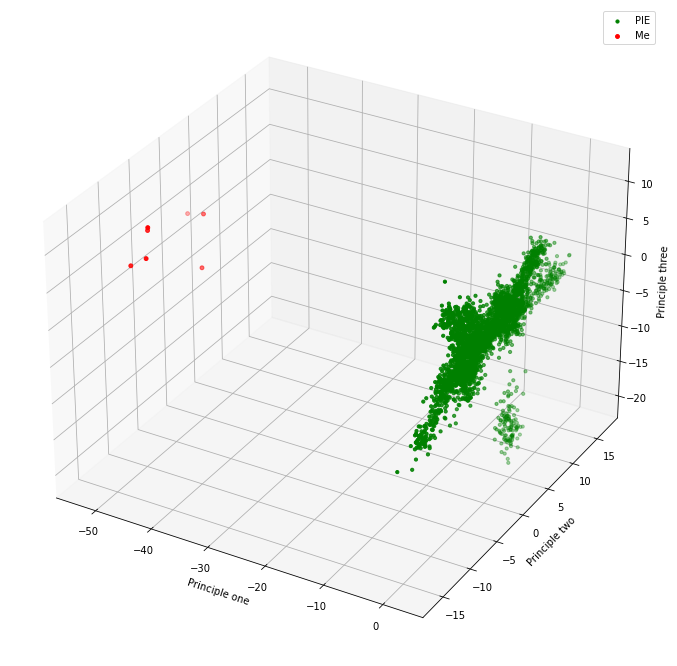

In [1]:

import os
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

# prepare my own photo
# pathlist = glob.glob(r"PIE/myself/*.jpg")
# for i,path in enumerate(pathlist):
#
#     img = cv2.imread(path,0)
#     img = cv2.resize(img,[32,32])
#     print(img.shape)
#     savepath = "PIE/0/"+str(i+1)+".jpg"
#     print(savepath)
#     cv2.imwrite(savepath, img)

# load data

indexlist = np.arange(1,69,1)
np.random.shuffle(indexlist)
indexlist = indexlist[0:25]
#indexlist = np.append(indexlist,0)
indexlist.sort()
print(indexlist)
eachclass_num = [len([f for f in os.listdir(os.path.join('PIE', str(s))) if f.endswith('.jpg')]) for s in indexlist]
total_num = sum(eachclass_num)
vector = np.zeros([total_num,32,32])
label = np.zeros([total_num,1])


n=0
for i,cls in enumerate(indexlist):
    for img_path in [f for f in os.listdir(os.path.join('PIE', str(cls))) if f.endswith('.jpg')]:
        img_path = "PIE/"+str(cls)+"/"+img_path
        img_cur = cv2.imread(img_path,0)
        vector[n] = img_cur
        label[n] = cls
        n += 1

vector = np.reshape(vector,(vector.shape[0],-1))
vector = np.concatenate([vector,label],axis=1)
np.random.shuffle(vector)
label[:,:] = vector[:,1024:1025]
vector = vector[:,0:1024]


self_vector = np.zeros([10,32,32])
self_label = np.zeros([10,1])
n=0
for img_path in [f for f in os.listdir(os.path.join('PIE', str(0))) if f.endswith('.jpg')]:
    img_path = "PIE/" + str(0) + "/" + img_path
    img_cur = cv2.imread(img_path, 0)
    self_vector[n] = img_cur
    n += 1
self_vector = np.reshape(self_vector,(self_vector.shape[0],-1))


trainset = vector[0:int(total_num*0.7)]
trainlabel = label[0:int(total_num*0.7)]
testset = vector[int(total_num*0.7):]
testlabel = label[int(total_num*0.7):]

# print(trainset.shape)
# print(trainlabel.shape)
# print(testset.shape)
# print(testlabel.shape)
trainset = np.concatenate([trainset,self_vector[0:7]])
trainlabel = np.concatenate([trainlabel,self_label[0:7]])
testset = np.concatenate([testset,self_vector[7:]])
testlabel = np.concatenate([testlabel,self_label[7:]])

print(trainset.shape)
print(trainlabel.shape)
print(testset.shape)
print(testlabel.shape)
def twoDplot(train_redu):
    fig = plt.figure(figsize=plt.figaspect(0.6))
    # 2D Plot
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(train_redu[0:len(train_redu)-7, 0], train_redu[0:len(train_redu)-7, 1], s = 10, c = 'g', label='PIE')
    ax.scatter(train_redu[len(train_redu)-7:len(train_redu), 0], train_redu[len(train_redu)-7:len(train_redu), 1], s = 15, c = 'r', label='Me')
    ax.set_xlabel('Principle one')
    ax.set_ylabel('Principle two')
    ax.legend()
    plt.show()
def threeDplot(train_redu):
    #fig = plt.figure(figsize=plt.figaspect(0.6))
    #3D Plot
    fig = plt.figure(1, figsize=(18, 12))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(train_redu[0:len(train_redu)-7, 0], train_redu[0:len(train_redu)-7, 1], train_redu[0:len(train_redu)-7, 2], s = 10, c = 'g', label='PIE')
    ax.scatter(train_redu[len(train_redu)-7:len(train_redu), 0], train_redu[len(train_redu)-7:len(train_redu), 1], train_redu[len(train_redu)-7:len(train_redu), 2], s = 15, c = 'r', label='Me')
    ax.set_xlabel('Principle one')
    ax.set_ylabel('Principle two')
    ax.set_zlabel('Principle three')
    ax.legend()
    plt.show()
def LDA(data,label,k):

    classlist = np.unique(label)
    class_num = len(classlist)
    mean_vector = np.zeros([class_num,data.shape[1]])
    SW = np.zeros([data.shape[1],data.shape[1]])
    mi = []

    for n in range(class_num):
        si = np.zeros([data.shape[1],data.shape[1]])
        c = classlist[n]
        clmatrix = data[label.T[0]==c]
        mean_vector[n] = clmatrix.mean(axis=0)
        for q in clmatrix:
            res = (q-mean_vector[n]).reshape(data.shape[1], 1)
            si += np.dot(res,res.T)
        weight = len(clmatrix)/len(data)
        SW += si*weight
        mi.append(len(clmatrix))

    SB = np.zeros([data.shape[1],data.shape[1]])
    total_mean = data.mean(axis=0)

    for n in range(class_num):
        weight = mi[n]
        res_t = (mean_vector[n]-total_mean).reshape(data.shape[1], 1)
        SB += weight * np.dot(res_t,res_t.T)

    eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))
    eigenvectors = eigenvectors.real
    sort = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sort]
    eigenvectors = eigenvectors[:, sort]
    eigenvalues = eigenvalues[0:k]
    eigenvectors = eigenvectors[:,0:k]
    return eigenvalues, eigenvectors



eigenvalues, eigenvectors = LDA(trainset,trainlabel,3)
train_redu = np.dot(trainset, eigenvectors)

# 2D Visualize
twoDplot(train_redu)

# 3D Visualize
threeDplot(train_redu)

In [3]:
#------------------------------------------------------KNN------------------------------------------------------------
def KNN(test_data, train_data, train_labels, k):
    train_data_size = train_data.shape[0]
    distance = (np.tile(test_data, (train_data_size, 1)) - train_data) ** 2
    total_distance = distance.sum(axis=1)
    Euler_distance = total_distance ** 0.5
    index = Euler_distance.argsort()
    classlist = []
    for i in range(k):
        vote_label = train_labels[index[i]]
        classlist.append(vote_label)
    classlist = np.array(classlist,dtype=np.int64)
    classlist = classlist.T[0]
    count = np.bincount(classlist)
    predict_class = np.argmax(count)
    return predict_class




trainset = vector[0:int(total_num*0.7)]
trainlabel = label[0:int(total_num*0.7)]
testset = vector[int(total_num*0.7):]
testlabel = label[int(total_num*0.7):]

trainset = np.concatenate([trainset,self_vector[0:7]])
trainlabel = np.concatenate([trainlabel,self_label[0:7]])
myset = self_vector[7:]
mylabel = self_label[7:]
# *********************************************************************2 dimensionalities
e_num = 2
eigenvalues, eigenfaces = LDA(trainset,trainlabel,e_num)
train_redu = np.dot(trainset, eigenfaces)
test_redu = np.dot(testset, eigenfaces)
my_redu = np.dot(myset,eigenfaces)

correct = 0
for i in range(len(test_redu)):
    predict_label = KNN(test_redu[i],train_redu,trainlabel,k=4)
    if predict_label == testlabel[i]:
        correct += 1
print("Accuracy of PIE (2 dimensionalities):",correct/len(test_redu))

correct=0
for i in range(len(my_redu)):
    predict_label = KNN(my_redu[i],train_redu,trainlabel,k=3)
    if predict_label == mylabel[i]:
        correct += 1
print("Accuracy of My own photos (2 dimensionalities):",correct/len(mylabel))

# ******************************************************************3 dimensionalities
e_num = 3
eigenvalues, eigenfaces = LDA(trainset,trainlabel,e_num)
train_redu = np.dot(trainset, eigenfaces)
test_redu = np.dot(testset, eigenfaces)
my_redu = np.dot(myset,eigenfaces)

correct = 0
for i in range(len(test_redu)):
    predict_label = KNN(test_redu[i],train_redu,trainlabel,k=4)
    if predict_label == testlabel[i]:
        correct += 1
print("Accuracy of PIE (3 dimensionalities):",correct/len(test_redu))

correct=0
for i in range(len(my_redu)):
    predict_label = KNN(my_redu[i],train_redu,trainlabel,k=3)
    if predict_label == mylabel[i]:
        correct += 1
print("Accuracy of My own photos (3 dimensionalities):",correct/len(mylabel))
# *******************************************************************9 dimensionalities
e_num = 9
eigenvalues, eigenfaces = LDA(trainset,trainlabel,e_num)
train_redu = np.dot(trainset, eigenfaces)
test_redu = np.dot(testset, eigenfaces)
my_redu = np.dot(myset,eigenfaces)

correct = 0
for i in range(len(test_redu)):
    predict_label = KNN(test_redu[i],train_redu,trainlabel,k=4)
    if predict_label == testlabel[i]:
        correct += 1
print("Accuracy of PIE (9 dimensionalities):",correct/len(test_redu))

correct=0
for i in range(len(my_redu)):
    predict_label = KNN(my_redu[i],train_redu,trainlabel,k=2)
    if predict_label == mylabel[i]:
        correct += 1
print("Accuracy of My own photos (9 dimensionalities):",correct/len(mylabel))


Accuracy of PIE (2 dimensionalities): 0.2645211930926217
Accuracy of My own photos (2 dimensionalities): 1.0
Accuracy of PIE (3 dimensionalities): 0.47566718995290425
Accuracy of My own photos (3 dimensionalities): 1.0
Accuracy of PIE (9 dimensionalities): 0.9097331240188383
Accuracy of My own photos (9 dimensionalities): 1.0
